# Модель предпочтительного присоединения

__Авторы задач: Макрушин С.В (SVMakrushin@fa.ru), Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 2: Модели"
* Документация:
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.extended_barabasi_albert_graph.html
* Дополнительные источники:
    * https://barabasi.com/f/623.pdf

## Вопросы для совместного обсуждения

1\. Обсудите модель предпочтительного присоединения

In [ ]:
import numpy as np

In [ ]:
a = np.random.normal(0, 1, size=50)
a[:5] = 0
l = np.cumsum(np.abs(a))
l

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.09590618,  2.50996403,  2.97861289,  4.4858809 ,  5.52020318,
        6.45064142,  7.18446985,  7.71093348,  8.13167392,  8.45748664,
       10.06603658, 10.46021462, 10.68844316, 10.91355131, 11.38762198,
       12.83417516, 12.9122536 , 13.33692574, 14.7138188 , 14.81271419,
       16.39671549, 16.49914339, 17.06407466, 17.16217917, 18.60445571,
       20.37853514, 20.77099752, 21.3216818 , 21.84326512, 23.11993571,
       24.33784437, 24.66803088, 24.93680566, 26.40279224, 26.60719141,
       27.4809066 , 27.50503959, 29.02215127, 29.46822486, 29.68065501,
       32.20834394, 33.40446696, 33.42948782, 34.70469364, 34.8307509 ])

In [ ]:
l[13+5]

10.91355130937328

In [ ]:
l[20]

12.834175164270762

2\. Обсудите процедуру log-binning

In [ ]:
np.geomspace(1, 1000, 3)

array([   1.       ,   31.6227766, 1000.       ])

In [ ]:
np.logspace(0, 3, 3)

array([   1.       ,   31.6227766, 1000.       ])

In [ ]:
np.linspace(1, 1000, 3) # не подойдет

array([   1. ,  500.5, 1000. ])

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Используя реализацию модели предпочтительного присоединения Барабаши-Альберта из `networkx`, постройте сеть с кол-вом узлов `n` > 50. Визуализируйте полученный граф, сделайте размер и цвет узлов пропорциональными их степени. Постройте график выборочной функции распределения степеней узлов для сети.

- [x] Проверено на семинаре

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [3]:
n = 55
k = 2
G = nx.barabasi_albert_graph(n, k)

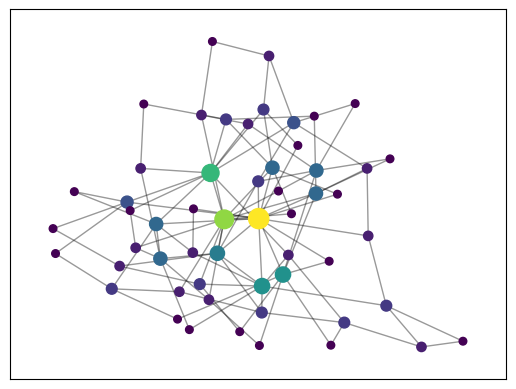

<Figure size 1000x600 with 0 Axes>

In [4]:
degrees = dict(G.degree())
node_sizes = [v * 15 for v in degrees.values()]
node_colors = [v for v in degrees.values()]

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis)
nx.draw_networkx_edges(G,pos,alpha=0.4)
plt.figure(figsize=(10,6))
plt.show()

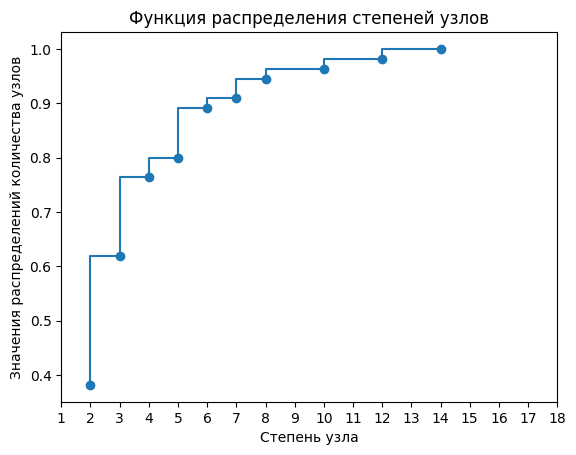

In [5]:
degree_values = sorted(set(degrees.values()))
degree_counts = [list(degrees.values()).count(x) for x in degree_values]
cumulative_counts = [sum(degree_counts[:i+1]) for i in range(len(degree_counts))]
cumulative_counts = [i/max(cumulative_counts) for i in cumulative_counts]

plt.step(degree_values, cumulative_counts, 'o-')
plt.xlabel('Степень узла')
plt.ylabel('Значения распределений количества узлов')
plt.title('Функция распределения степеней узлов')
plt.xticks(range(1, 19))
plt.show()

<p class="task" id="2"></p>

2\. Используя реализацию модели предпочтительного присоединения Барабаши-Альберта из `networkx`, постройте сеть с кол-вом узлов `n=10000`. Визуализируйте закон распределения степеней узлов сети в обычной и логарифимических (по 1й и по 2м осям) системах координат.

- [ ] Проверено на семинаре

In [30]:
N = 10000
m = 2

In [34]:
G = nx.barabasi_albert_graph(N, m)
node_degrees = dict(G.degree())
node_sizes = [75 * node_degrees[node] for node in G.nodes]
node_colors = [node_degrees[node] for node in G.nodes]

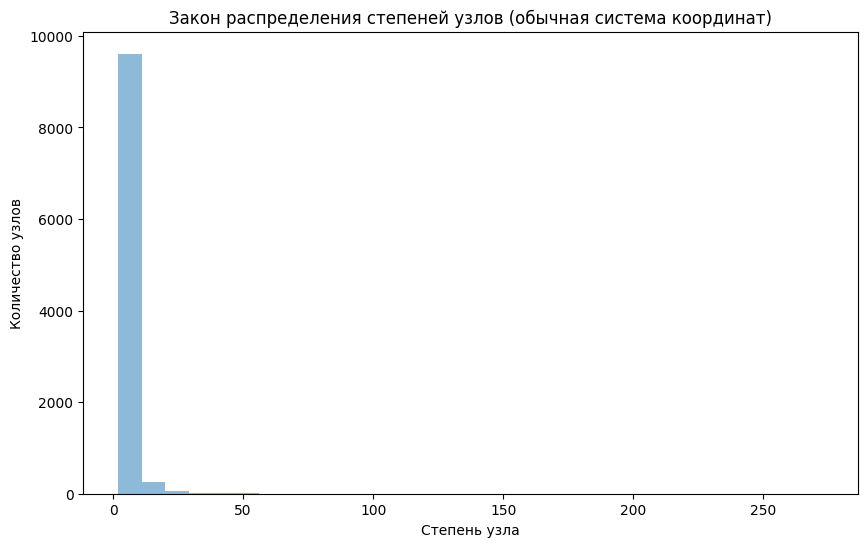

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(list(node_degrees.values()), bins=30, alpha=0.5)
plt.xlabel('Степень узла')
plt.ylabel('Количество узлов')
plt.title('Закон распределения степеней узлов (обычная система координат)')
plt.show()

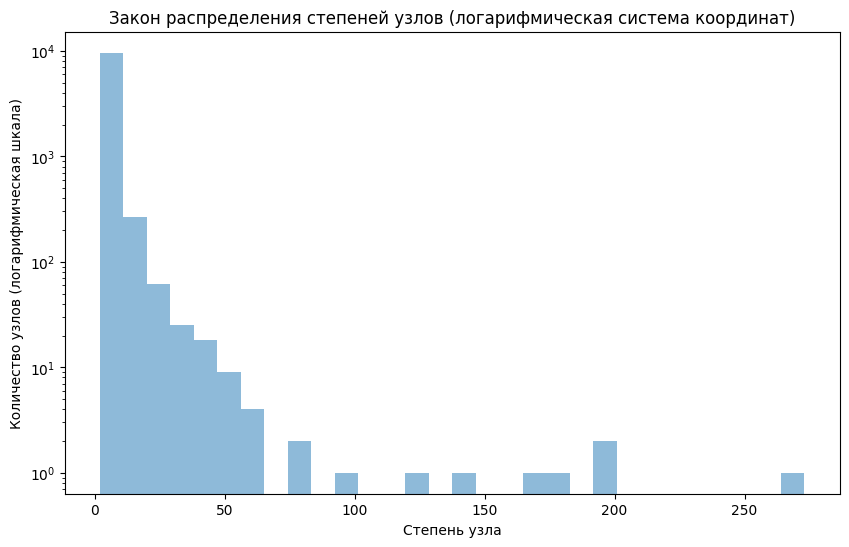

In [38]:
plt.figure(figsize=(10, 6))
plt.hist(list(node_degrees.values()), bins=30, alpha=0.5, log=True)
plt.xlabel('Степень узла')
plt.ylabel('Количество узлов (логарифмическая шкала)')
plt.title('Закон распределения степеней узлов (логарифмическая система координат)')
plt.show()

<p class="task" id="3"></p>

3\. Визуализируйте закон распределения степеней узлов с использованием log-binning для сети из предыдущего задания. Для сравнения на этом же графике изобразите график закона распределения без использования log-binning в log-log координатах.

- [ ] Проверено на семинаре

In [10]:
degrees = [degree for node, degree in G.degree()]

In [11]:
def log_binning(data, bin_count=10):
    log_data = np.log10(data)
    bins = np.logspace(np.min(log_data), np.max(log_data), num=bin_count)
    bin_means, _ = np.histogram(data, bins=bins)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    return bin_centers, bin_means

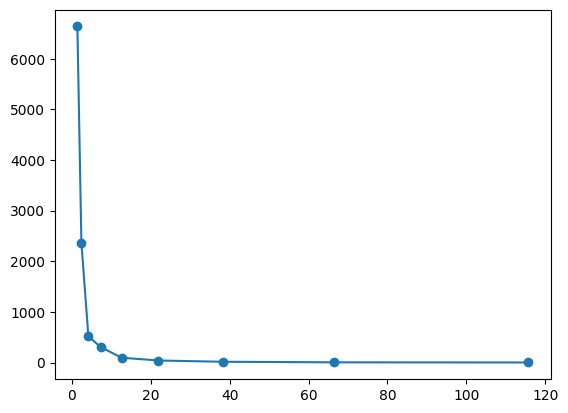

In [12]:
log_bin_centers, log_bin_counts = log_binning(degrees)
plt.plot(log_bin_centers, log_bin_counts, 'o-', label='Log-binning')

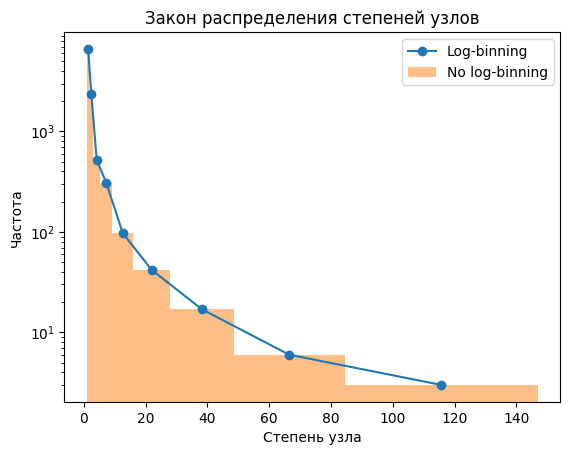

In [13]:
log_bin_centers, log_bin_counts = log_binning(degrees)
plt.plot(log_bin_centers, log_bin_counts, 'o-', label='Log-binning')

plt.hist(degrees, bins=10 ** np.linspace(np.log10(np.min(degrees)), np.log10(np.max(degrees)), num=10),
         alpha=0.5, label='No log-binning', log=True)

plt.xlabel('Степень узла')
plt.ylabel('Частота')
plt.title('Закон распределения степеней узлов')
plt.legend()

plt.show()

<p class="task" id="4"></p>

4\. Реализуйте алгоритм предпочтительного присоединения с целочисленными параметрами  `n0`, `m` ,`𝑡`:

* `n0`  - количество узлов в исходной сети (считаем, что исходная сеть является полным графом);
* `m`  - количество связей у каждого вновь добавляемого узла;
* `𝑡`   - количество итераций по добавлению нового узла.

Проверьте корректность алгоритма с помощью анализа распределения степеней узлов сгенерированной сети.

- [ ] Проверено на семинаре

In [14]:
import random

In [15]:
def alg(n0, m, t):
    G = nx.complete_graph(n0)
    for i in range(t):
        degrees = list(dict(G.degree()).values())
        probabilities = [degree / sum(degrees) for degree in degrees]
        results = random.choices(list(G.nodes()), weights=probabilities, k=m)
        G.add_edges_from([(n0 + i, result) for result in results])
    return G

In [22]:
n0 = 10
m = 3
t = 100

G = alg(n0, m, t)

In [23]:
degrees = [degree for l, degree in G.degree()]

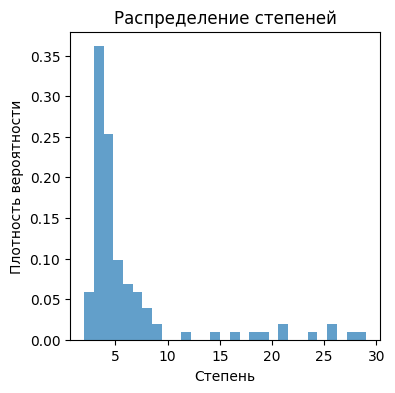

In [24]:
plt.figure(figsize=(4, 4))
plt.hist(degrees, bins=max(degrees), density=True, alpha=0.7)
plt.title('Распределение степеней')
plt.xlabel('Степень')
plt.ylabel('Плотность вероятности')
plt.show()

<p class="task" id="5"></p>

5\. Используя реализацию расширенной модели Барабаши-Альберта из `networkx`, постройте сеть с кол-вом узлов `n` = 500 с двумя наборами параметров:
* p=0.1, q=0.1
* p=0.3, q=0.3.

Сравните распределение степеней узлов полученных графов и сделайте выводы.

- [ ] Проверено на семинаре

In [26]:
n = 500
m = 2
p = 0.1
q = 0.1

G1 = nx.extended_barabasi_albert_graph(n, m, p, q)

degrees1 = [degree for node, degree in G1.degree()]

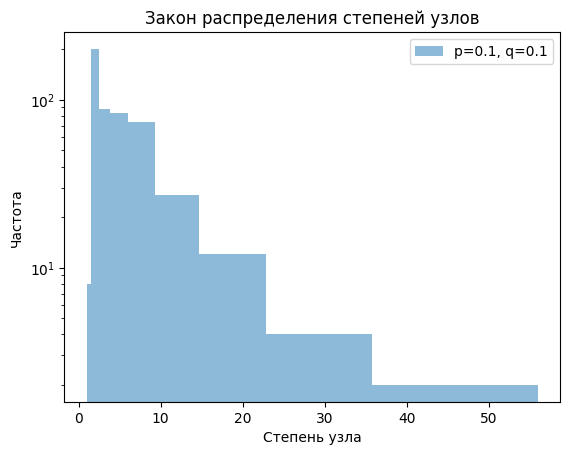

In [27]:
plt.hist(degrees1, bins=10 ** np.linspace(np.log10(np.min(degrees1)), np.log10(np.max(degrees1)), num=10),
         alpha=0.5, label='p=0.1, q=0.1', log=True)

plt.xlabel('Степень узла')
plt.ylabel('Частота')
plt.title('Закон распределения степеней узлов')
plt.legend()

plt.show()

In [28]:
n = 500
m = 2
p = 0.3
q = 0.3

G2 = nx.extended_barabasi_albert_graph(n, m, p, q)

degrees2 = [degree for node, degree in G2.degree()]

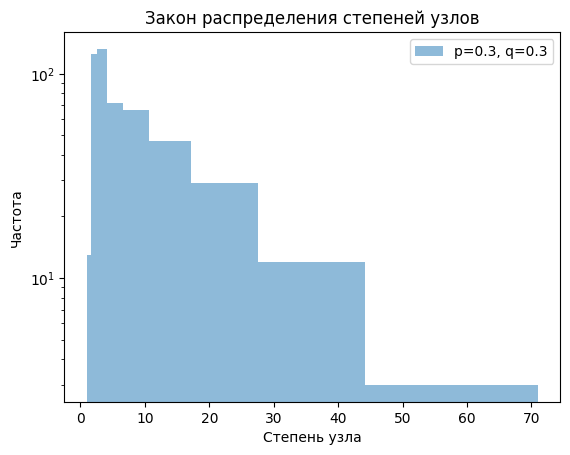

In [29]:
plt.hist(degrees2, bins=10 ** np.linspace(np.log10(np.min(degrees2)), np.log10(np.max(degrees2)), num=10),
         alpha=0.5, label='p=0.3, q=0.3', log=True)

plt.xlabel('Степень узла')
plt.ylabel('Частота')
plt.title('Закон распределения степеней узлов')
plt.legend()

plt.show()

Вывод: с увеличением вероятности - увеличивается частота.